How to Do Linear Regression using Gradient Descent
---

[![](https://i.ytimg.com/vi/XdM6ER7zTLk/hqdefault.jpg)](https://youtu.be/XdM6ER7zTLk?list=PL2-dafEMk2A7YdKv4XfKpfbTH5z6rEEj3)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from numpy import *

/home/dillon/projects/line-art-gan/env/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Computer error for given points
$$Error_{(m,b)} = \frac{1}{N} \sum_{i=1}^N ( y_i - (mx_i + b))^2$$

    N: len(points)
    x: first col in points
    y: second col in points

In [2]:
def compute_err_for_given_pts(b, m, points):
    err = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        err += (y - (m * x + b)) **2
    return err / float(len(points))

### Compute Gradient Descent

![](https://spin.atomicobject.com/wp-content/uploads/gradient_descent_error_surface.png)
Graph of all possible: y-intercepts(b), slopes(m), and error values

#### GOAL: find the point with smallest error (local minima)

the way that we calculate the smallest point is by iteratively computing the gradient (tangent line, direction to the smallest point)

![](https://miro.medium.com/max/1200/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg)
Bowl shape showing iterative process of finding smallest point(error)

#### Partial derivative (m)
$$\frac{\partial}{\partial m} = \frac{2}{N} \sum_{i=1}^N - x_i (y_i - (mx_i + b))$$

#### Partial derivative (b)
$$\frac{\partial}{\partial b} = \frac{2}{N} \sum_{i=1}^N - (y_i - (mx_i + b))$$

    N: len(points)

In [3]:
def step_gradient(step_b, step_m, points, learning_rate):
    # gradient descent
    b_grad = 0
    m_grad = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        b_grad += -(2/N) * (y - ((step_m * x) + step_b))
        m_grad += -(2/N) * x * (y - ((step_m * x) + step_b))
        
    new_b = step_b - (learning_rate * b_grad)
    new_m = step_m - (learning_rate * m_grad)
    return [new_b, new_m]
    
def gradient_descent_runner(points, start_b, start_m, learning_rate, num_iterations):
    b = start_b
    m = start_m

    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

In [4]:
# dataset
points = genfromtxt('data.csv', delimiter=",")

# hyper param
learning_rate = 0.0001
num_iterations = 1000

# y = mx + b
initial_b = 0
initial_m = 0

print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_err_for_given_pts(initial_b, initial_m, points)))
print("Running...")
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_err_for_given_pts(b, m, points)))

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


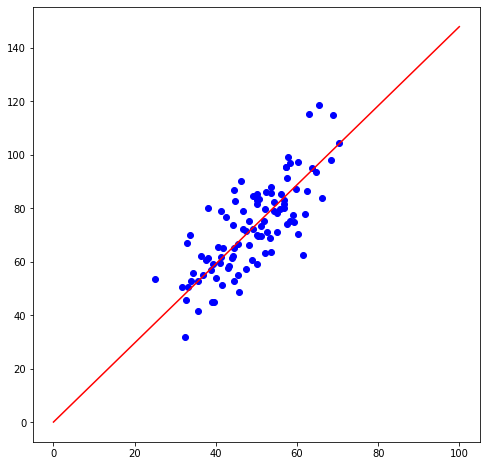

In [7]:
plt.figure(figsize=(8,8))

for point in array(points):
    plt.plot(point[0], point[1], 'bo')

x = linspace(0, 100)
y = m*x + b
plt.plot(x, y, '-r')
    
plt.show()